<a href="https://colab.research.google.com/github/Andrey-Miroshnikov/dap-2024/blob/main/les07/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №7
## Классификация

**Выполнил:** Мирошников Андрей Евгеньевич  
**Группа:** 12002308

### Цель работы

Освоить методы построения и оценки моделей классификации на реальном наборе данных. Изучить полный цикл работы с задачей бинарной классификации: от предварительной обработки данных до оценки качества модели.

### Ход работы


## Извлечение данных

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.

1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [167]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


Задание №1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [169]:
url = 'https://raw.githubusercontent.com/Andrey-Miroshnikov/dap-2024/main/les07/data/titanic.csv'
titanic_df = pd.read_csv(url, index_col='PassengerId')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Задание №2. Выведете первые 7 строк набора.

In [170]:
titanic_df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Подготовка данных

Задание №3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [171]:
print("\nИнформация о типах данных:")
print(titanic_df.info())
print("\nПроверка на наличие null значений:")
print(titanic_df.isnull().sum())


Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None

Проверка на наличие null значений:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Задание №4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на значение выжил или погиб пассажир.

In [172]:
print("\nСуществующие столбцы:")
print(titanic_df.columns.tolist())




Существующие столбцы:
['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [173]:
tianic_df = titanic_df[["Survived","Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Задание №5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [174]:
titanic_df['male'] = (titanic_df['Sex'] == 'male').astype('float64')
titanic_df['female'] = (titanic_df['Sex'] == 'female').astype('float64')
titanic_df = titanic_df.drop(columns=['Sex'])
titanic_df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0.0,1.0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1.0,0.0
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0.0,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,1.0


Задание №6. Удалите строки, которые содержать хотя бы одно null значение.

In [175]:
# Удаление строк, содержащих хотя бы одно null значение
print(f"Размер DataFrame до удаления: {titanic_df.shape}")
print("Количество null значений по столбцам до удаления:")
print(titanic_df.isnull().sum())

# Удаляем строки с любыми null значениями
titanic_df_cleaned = titanic_df.dropna()

print(f"\nРазмер DataFrame после удаления: {titanic_df_cleaned.shape}")
print("Количество null значений по столбцам после удаления:")
print(titanic_df_cleaned.isnull().sum())

# Проверяем, что действительно нет null значений
if titanic_df_cleaned.isnull().sum().sum() == 0:
    print("\n✓ Все строки с null значениями успешно удалены")
else:
    print("\n✗ В данных остались null значения")

print(f"\nУдалено строк: {original_size - cleaned_size}")
print(f"Осталось строк: {cleaned_size}")

# Обновляем исходный DataFrame
titanic_df = titanic_df_cleaned

Размер DataFrame до удаления: (891, 12)
Количество null значений по столбцам до удаления:
Survived      0
Pclass        0
Name          0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
male          0
female        0
dtype: int64

Размер DataFrame после удаления: (183, 12)
Количество null значений по столбцам после удаления:
Survived    0
Pclass      0
Name        0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
male        0
female      0
dtype: int64

✓ Все строки с null значениями успешно удалены

Удалено строк: 0
Осталось строк: 712


## Исследование данных

Задание №7. Нормализуйте значения признака "Fare".

In [176]:
titanic_df_fare_age=titanic_df[['Age','Fare']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_df_fare_age)
titanic_df_fare_age = pd.DataFrame(scaled_data, columns=["Age","Fare"], index = titanic_df.index)
titanic_df = titanic_df[['Survived','Pclass','SibSp','Parch','female','male']].join(titanic_df_fare_age)
titanic_df.describe()

,Survived,Pclass,SibSp,Parch,female,male,Age,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,1.830000e+02
mean,0.672131,1.191257,0.464481,0.475410,0.480874,0.519126,-1.650168e-16,1.140557e-16
std,0.470725,0.515187,0.644159,0.754617,0.501005,0.501005,1.002743e+00,1.002743e+00
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.227696e+00,-1.033406e+00
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-7.483096e-01,-6.433299e-01
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.086869e-02,-2.847750e-01
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.579979e-01,1.486431e-01
max,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.841189e+00,5.695465e+00


Задание №8. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [179]:
titanic_df.pivot_table('Fare', columns='Survived', aggfunc='mean')

Survived,0,1
Fare,-0.192204,0.093758


Задача №9. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

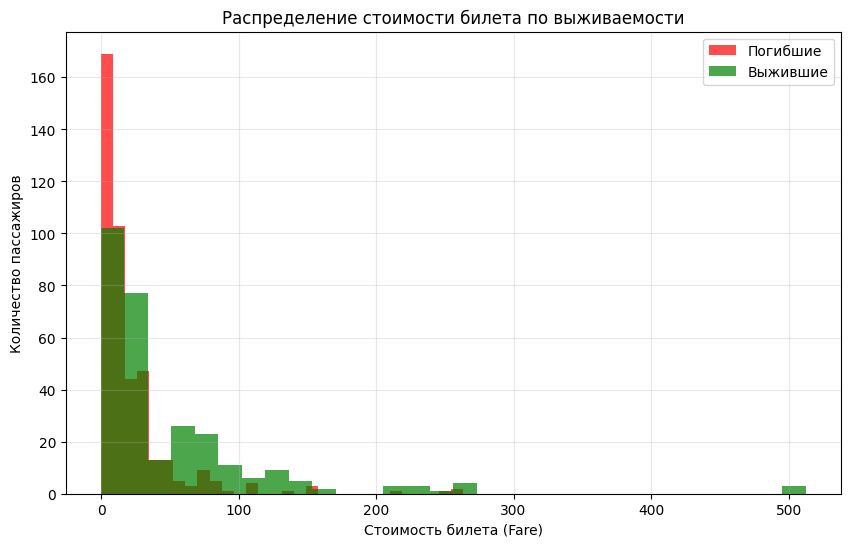

In [186]:
# Гистограммы значений "Fare" для погибших и выживших
plt.figure(figsize=(10, 6))
plt.hist(titanic_cleaned[titanic_cleaned['Survived'] == 0]['Fare'],
         alpha=0.7, label='Погибшие', bins=30, color='red')
plt.hist(titanic_cleaned[titanic_cleaned['Survived'] == 1]['Fare'],
         alpha=0.7, label='Выжившие', bins=30, color='green')
plt.xlabel('Стоимость билета (Fare)')
plt.ylabel('Количество пассажиров')
plt.title('Распределение стоимости билета по выживаемости')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Задание №10. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [190]:
X = titanic_df[['Pclass','SibSp','Parch','female','male','Fare','Age']]
y = titanic_df['Survived']

## Предсказательная модель

Задание №11. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (137, 7)
Размер тестовой выборки: (46, 7)


Задание №12. Выполните обучение модели.

In [200]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, algorithm='auto')

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Проверка модели

Задание №13. Выведите мартицу ошибок.

In [202]:
from sklearn.metrics import confusion_matrix
model_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,11,4
1,12,19


Задание №14. Расчитайте accuracy.

In [203]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy,2)

0.65

Задание №15. Сделайте вывод о полученном результате.

##Вывод
Точность модели составляет 65%, что указывает на относительно низкую эффективность предсказаний. Это может быть связано с проблемами в данных, недостаточной обученностью модели или нерелевантными признаками. Точность модели может быть улучшена с помощью подбора признаков и других алгоритмов.

## Ответы на контрольные вопросы

### 1. Сформулируйте задачу классификации.
Задача классификации - это задача машинного обучения, в которой требуется отнести объекты к одному из заранее определенных классов (категорий) на основе их признаков.

### 2. Перечислите типы классификации.
- Бинарная классификация (2 класса)
- Мультиклассовая классификация (3 и более классов)
- Многометочная классификация (один объект может принадлежать нескольким классам)
- Иерархическая классификация

### 3. В чем особенность несбалансированной классификации?
Особенность в том, что классы представлены в данных непропорционально (один класс значительно преобладает над другими). Это требует специальных методов обработки: взвешивание классов, oversampling/undersampling, использование специальных метрик.

### 4. В чем особенность мультиклассовой классификации?
Особенность в наличии трех и более взаимно исключающих классов. Требует использования специальных стратегий: "один против всех" (One-vs-Rest) или "один против одного" (One-vs-One).

### 5. В чем особенность бинарной классификации?
Особенность в наличии только двух классов (например: спам/не спам, выжил/погиб). Является наиболее изученным и распространенным типом классификации.

### 6. В чем особенность классификации по нескольким меткам?
Особенность в том, что один объект может одновременно принадлежать нескольким классам (например: статья может относиться к категориям "политика", "экономика", "международные отношения").

### 7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?
- **Один против всех**: Для каждого класса строится бинарный классификатор, который отличает этот класс от всех остальных
- **Один против одного**: Для каждой пары классов строится отдельный классификатор

### 8. Что такое матрица ошибок (несоответствий)?
Матрица ошибок - это таблица, которая показывает распределение предсказаний модели по сравнению с фактическими значениями. Содержит четыре показателя:
- True Positive (TP)
- True Negative (TN)
- False Positive (FP)
- False Negative (FN)

### 9. Как рассчитывается Accuracy?
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Показывает долю правильных предсказаний среди всех предсказаний.

### 10. Объясните алгоритм классификации K-ближайших соседей.
Алгоритм KNN относит объект к тому классу, к которому принадлежит большинство из k его ближайших соседей в пространстве признаков. Основные этапы:
1. Выбор метрики расстояния (евклидово, манхэттенское и др.)
2. Выбор числа соседей k
3. Поиск k ближайших объектов
4. Голосование: объект относится к классу, который преобладает среди соседей